In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sales_train=pd.read_csv('F:\Kaggle Data Sets\competitive-data-science-predict-future-sales\sales_train.csv')

In [3]:
sales_train.dtypes

date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object

In [4]:
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [6]:
sales_train.shape

(2935849, 6)

In [7]:
sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

## Calculating Feature Importaces

## Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
X=sales_train.drop(['date','item_cnt_day','item_price','date_block_num'],axis=1)
y=sales_train['item_cnt_day']

Feature: 0, Score: -0.00092
Feature: 1, Score: 0.00001


<BarContainer object of 2 artists>

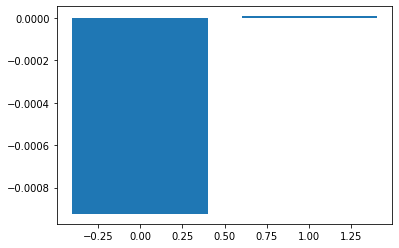

In [9]:
lr=LinearRegression()
lr.fit(X,y)
importance=lr.coef_
for k,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (k,v))
plt.bar([x for x in range(len(importance))],importance)

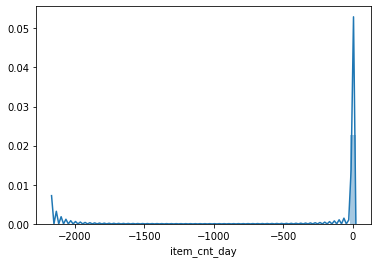

In [10]:
y_pred=lr.predict(X)
sns.distplot((y_pred-y))

In [11]:
from sklearn.metrics import mean_squared_error,r2_score

In [12]:
mse_lr=mean_squared_error(y,y_pred)
rmse_lr=np.sqrt(mse_lr)
r2=r2_score(y,y_pred)
print('Mean Squared Error-> ',mse_lr)
print('Root mean squared error-> ',rmse_lr)
print('R2 Score-> ',r2)

Mean Squared Error->  6.856165579051934
Root mean squared error->  2.618428074065036
R2 Score->  0.00030996952501038955


In [13]:
import csv

In [15]:
test_data=pd.read_csv(r'F:\Kaggle Data Sets\competitive-data-science-predict-future-sales\test.csv')

In [16]:
test_data.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [17]:
X_test=test_data.drop('ID',axis=1)

In [18]:
y_test_pred=lr.predict(X_test)

In [21]:
y_test_pred[:200]

array([1.23257084, 1.23454177, 1.23393587, 1.23392891, 1.23417962,
       1.23258477, 1.2325987 , 1.23263352, 1.23453481, 1.23233405,
       1.23096206, 1.23121975, 1.22957614, 1.23140082, 1.23140779,
       1.23142171, 1.23143564, 1.23007062, 1.231561  , 1.23206244,
       1.23034223, 1.23232709, 1.23804488, 1.2379822 , 1.23858114,
       1.23862989, 1.23863685, 1.23679128, 1.23688878, 1.23701414,
       1.23695146, 1.23696539, 1.23697236, 1.23699325, 1.23686093,
       1.23703504, 1.23700718, 1.23698629, 1.23819809, 1.23817024,
       1.23816327, 1.23802398, 1.23803095, 1.23803791, 1.23805184,
       1.23806577, 1.23807273, 1.2380797 , 1.23808666, 1.23814238,
       1.23814934, 1.23815631, 1.23550983, 1.23809363, 1.22347531,
       1.23035616, 1.22075919, 1.22077312, 1.22082187, 1.22082883,
       1.2208358 , 1.22091937, 1.22092634, 1.22212422, 1.22213118,
       1.22236101, 1.22309227, 1.22309923, 1.2231062 , 1.22316191,
       1.22259083, 1.22084276, 1.22071044, 1.22068955, 1.22121

In [25]:
fields=['ID','item_cnt_month']
row=list()
for i in test_data.index:
    row_i=[int(test_data.loc[i,'ID']),y_pred[i]]
    row.append(row_i)

In [26]:
row=np.array(row)
file_name='predict_sales.csv'

In [27]:
with open(file_name, 'w') as csvfile:  
    # creating a csv writer object  
    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
    csvwriter.writerow(fields)  
        
    # writing the data rows  
    csvwriter.writerows(row) 

## SVM Regression

In [ ]:
sns.scatterplot(x='shop_id',y='item_cnt_day',data=sales_train)

In [ ]:
test=pd.read_csv(r'F:\Kaggle Data Sets\competitive-data-science-predict-future-sales\test.csv')

In [ ]:
test.head()